## Práctica Final - Las Herramientas del Científico de Datos 
### Ejercicio 1 - EDA (Exploratory Data Analysis) Python
### Pedro Cortés Soberanes 
### Máster Data Science & Business Analytics

In [53]:
# Importamos las librerias a usar en el ejercicio 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from plotnine import *
output_notebook()

Loading BokehJS ...

#### 1. Une los doce dataframe desde Enero a Diciembre en un único dataframe. Muestra el shape total del dataframe resultante.

In [54]:
# Creamos una lista con el nombre de los archivos a importar 
files = ["202101_detalle.csv","202102_detalle.csv","202103_detalle.csv","202104_detalle.csv","202105_detalle.csv"
       ,"202106_detalle.csv","202107_detalle.csv","202108_detalle.csv","202109_detalle.csv"
        ,"202110_detalle.csv","202111_detalle.csv","202112_detalle.csv"]

# Cargamos y concatenamos cada archivo para crear un dataframe del año 2021
df_year = pd.concat((pd.read_csv(file, sep=";",encoding="ISO-8859-1") for file in files), axis=0)

#### 2. Como tal, no vamos a trabajar con datos geográficos, borra las columnas COORDENADA_X y COORDENADA_Y.

In [55]:
# Eliminamos las columnas COORDENADA-X & COORDENADA-Y ya que no trabajaremos con datos geograficos
df_year.drop(["COORDENADA-X", "COORDENADA-Y                                                                                                                                "], axis = 1, inplace=True) 

#### 3. Revisa los valores únicos de las variables, hay algunas de ellas que no tienen valores únicos por lo que son constantes ¿merece la pena tenerlas en el dataframe?

In [56]:
# Revisamos la variable año para comprovar que es una constante, por lo que no merece la pena tenerla en nuestro dataframe 
df_year["ANIO"].unique()

# Drop de AÑIO
df_year.drop(["ANIO"], axis = 1, inplace=True) 
df_year

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,19.45,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,19.51,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,
2,LEVE,PO LA HABANA 17,1,13.32,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,
3,LEVE,PLAZA PLATERIA DE MARTINEZ 1,1,21.24,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,
4,LEVE,CALLE SAN BERNARDO 91,1,1.05,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,
...,...,...,...,...,...,...,...,...,...,...,...
193613,GRAVE,"M-30 CALZADA 1 KM 19,800",12,21.24,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,77
193614,GRAVE,"M-30 CALZADA 1 KM 19,800",12,21.36,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,75
193615,GRAVE,"M-30 CALZADA 1 KM 19,800",12,21.37,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,78
193616,GRAVE,"M-30 CALZADA 1 KM 19,800",12,23.11,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,79


#### 4. Parece que las columnas VEL_LIMITE y, VEL_CIRCULA tienen valores vacíos, esto se debe a que, si la infracción no se produjo por rebasar ningún límite de velocidad, este valor aparece vacío, cambia todas las anomalías que detectes por nulo. Pista: Investiga cómo emplear con regex una expresión regular como r'^\s*$' en la función replace.

In [57]:
# Realizamos el cambio a nulos en las columnas VEL_LIMITE & VEL_CIRCULA mediante el regex r"^\s*$"
df_year['VEL_LIMITE'].replace(to_replace=r"^\s*$", value= np.NaN, regex=True, inplace=True)
df_year['VEL_CIRCULA '].replace(to_replace=r"^\s*$", value= np.NaN, regex=True, inplace=True)

print("*CANTIDAD de datos nulos por columna en el dataframe")
print(df_year.isnull().sum())
print("------------------------------------------------------")
print("*PORCENTAJE de datos nulos por columna en el dataframe")
print(df_year.isnull().sum()/len(df_year)*100)

*CANTIDAD de datos nulos por columna en el dataframe
CALIFICACION          0
LUGAR                 0
MES                   0
HORA                  0
IMP_BOL               0
DESCUENTO             0
 PUNTOS               0
DENUNCIANTE           0
HECHO-BOL             0
VEL_LIMITE      1591715
VEL_CIRCULA     1591715
dtype: int64
------------------------------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
CALIFICACION     0.000000
LUGAR            0.000000
MES              0.000000
HORA             0.000000
IMP_BOL          0.000000
DESCUENTO        0.000000
 PUNTOS          0.000000
DENUNCIANTE      0.000000
HECHO-BOL        0.000000
VEL_LIMITE      79.047358
VEL_CIRCULA     79.047358
dtype: float64


#### 5. Las dos columnas VEL_LIMITE y VEL_CIRCULA pese a ser dos columnas puramente numéricas, se reconocen como tipo "object", revisa la frecuencia de valores, verás que se cuentan como cadenas de texto, por lo tanto:

- Cambia los nulos de las dos variables por 0

In [58]:
# Remplazamos los nulos NaN de ambas variables por 0 usando fillna
df_year['VEL_LIMITE'].fillna('0',inplace=True)
df_year['VEL_CIRCULA '].fillna('0',inplace=True)

- Cambia el tipo de la variable a numérico.

In [59]:
# Cambiamos toda la columna a numerico utilizando la funcion to_numeric()
df_year['VEL_LIMITE'] = pd.to_numeric(df_year['VEL_LIMITE'])
df_year['VEL_CIRCULA '] = pd.to_numeric(df_year['VEL_CIRCULA '])

- ¿Cuál es la velocidad límite más repetida distinto de cero?

In [60]:
# Hacemos un Series con el conteo por velocidad limite y posterior a eso retiramos el 0 y sacamos el valor máximo
vel_lim = df_year['VEL_LIMITE'].value_counts()
vel_lim.drop(labels=[0], inplace=True)
print("km/h -> Cantidad")
vel_lim[vel_lim==vel_lim.max()]

km/h -> Cantidad


70    280182
Name: VEL_LIMITE, dtype: int64

#### 6. Genera una nueva columna llamada DIFERENCIA_KMH que sea el resultado de restar a cada valor de la velocidad a la que circulaba el conductor la velocidad límite en la que se produce la infracción, obtén un top 10 de los conductores que rebasaron los límites a mayor velocidad.

In [61]:
# Generamos nueva columna DIFERENCIA_KMH y vizualizamos el top 10 de los conductores que rebasaron los límites a mayor velocidad.
df_year["DIFERENCIA_KMH"] = df_year["VEL_CIRCULA "]-df_year["VEL_LIMITE"]
df_year.sort_values("DIFERENCIA_KMH", ascending=False).head(10)

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
11117,GRAVE,"M 30 KM 6,700 CR 3 C 1",6,1.29,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
47056,GRAVE,"M 30 KM 0,500 CALZADA 1",4,1.41,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
71569,GRAVE,M 30 XC KM 16 CARRIL 1,3,23.39,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
45812,GRAVE,"M 30 FTE KM 4,150 CR 4",1,19.02,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
3129,GRAVE,M 30 KM 27 CALZADA 2,10,0.40,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
57809,GRAVE,M 30 KM 27 CR 2 CALZADA 2,2,1.32,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
47055,GRAVE,AV PUERTA DE HIERRO F 2,4,1.07,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,80,149,69
8361,GRAVE,"M 30 FTE KM 04,15 CR 4",5,21.38,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,138,68
21708,GRAVE,"M-30 C-1 KM 6,700 CR3",8,4.34,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,158,68
71570,GRAVE,"M 30 XC KM 16,53 CR 4",3,2.50,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,138,68


#### 7. Obtén un dataframe filtrado por todas las denuncias que hayan acarreado retirada de puntos (es decir, puntos distintos de cero). Agrupa el dataframe filtrado por el agente público que emite la denuncia, ¿cuál de todos los agentes públicos tiene una mayor media de retirada de puntos?

In [62]:
# Realizamos una variable que nos regrese todos puntos mayores a 0 
more_than_0 = df_year[' PUNTOS'] > 0
more_than_0.head()
# Regresamos todos los valores mayores a 0 y agrupamos por denunciante sacando la media de puntos
df_mean_points = df_year[more_than_0]
agroup = df_mean_points.groupby(["DENUNCIANTE"]).mean()[" PUNTOS"]
agroup

DENUNCIANTE
AGENTES DE MOVILIDAD    3.937684
POLICIA MUNICIPAL       3.365720
Name:  PUNTOS, dtype: float64

#### 8. De la columna hora elimina la parte decimal, muestra de forma gráfica en qué horas se han producido más multas.

Text(0, 0.5, 'TOTAL DE MULTAS')

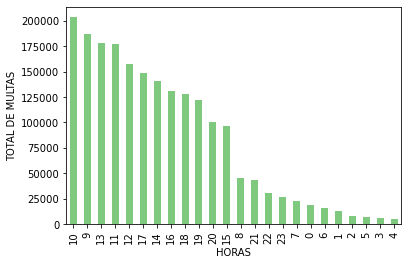

In [63]:
# Cambiamos la columna HORA a type int para quitar los decimales y comenzar a graficar.
df_year['HORA'] = df_year['HORA'].astype(int)
ax = df_year['HORA'].value_counts().plot.bar(colormap="Accent")
ax.set_xlabel("HORAS")
ax.set_ylabel("TOTAL DE MULTAS")

#### 9. Muestra de forma gráfica y numérica el número de infracciones (sin frecuencia acumulada), de cada uno de los agentes públicos en función de la calificación de la infracción

In [64]:
# Hacemos un groupby por denunciante y calificación para despues poder hacer el conteo.
df = df_year.groupby(["DENUNCIANTE","CALIFICACION"]).count()["MES"]
df

DENUNCIANTE           CALIFICACION
AGENTES DE MOVILIDAD  GRAVE           193733
                      LEVE            237260
                      MUY GRAVE          253
POLICIA MUNICIPAL     GRAVE           451564
                      LEVE            117787
                      MUY GRAVE         8203
SACE                  GRAVE            13104
                      LEVE              3415
SER                   GRAVE            33664
                      LEVE            954639
Name: MES, dtype: int64

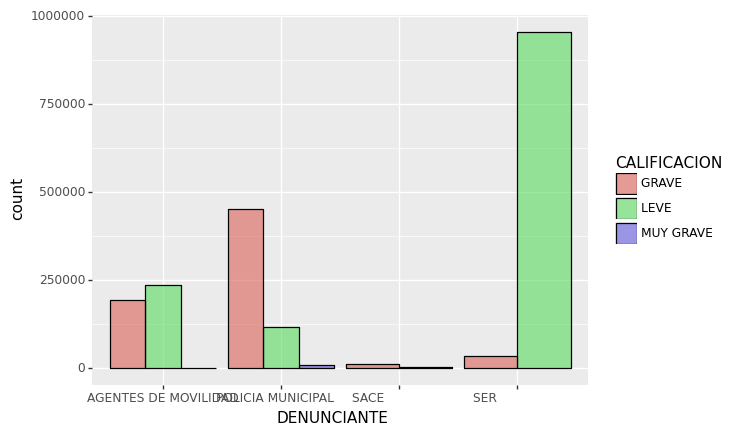

<ggplot: (8787729717902)>

In [65]:
# Utilizamos ggplot para graficar
(
 ggplot(df_year)         
 + aes(x='DENUNCIANTE', fill = 'CALIFICACION')   
 + geom_bar(color = 'black', alpha = 0.6, show_legend=True, position=position_dodge()) # Legeng True/False
)